In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
X = np.load("Training_Data/test_x.npy")
y = np.load("Training_Data/test_y.npy")

In [3]:
data = (X/255.).reshape(-1,128*128)
labels = y.reshape(-1,)
print(f"Data Shape: {data.shape}\nLabels Shape: {labels.shape}")

Data Shape: (3998, 16384)
Labels Shape: (3998,)


In [4]:
feat_cols = ['pixel'+str(i) for i in range(data.shape[1]) ]
df = pd.DataFrame(data,columns=feat_cols)
df['y'] = labels
df['label'] = df['y'].apply(lambda i: str(i))
df['label'].replace(to_replace=['0', '1', '2', '3', '4', '5', '6', '7'],
           value= ['Hip-Hop', 'International', 'Electronic', 'Folk', 'Experimental', 'Rock', 'Pop', 'Instrumental'], 
           inplace=True)
data, labels = None, None
print('Size of the dataframe: {}'.format(df.shape)); df

Size of the dataframe: (3998, 16386)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,y,label
0,0.768627,0.760784,0.737255,0.725490,0.737255,0.756863,0.749020,0.725490,0.776471,0.721569,...,0.729412,0.768627,0.780392,0.741176,0.709804,0.721569,0.756863,0.780392,2,Electronic
1,0.603922,0.623529,0.662745,0.713725,0.678431,0.549020,0.517647,0.607843,0.611765,0.600000,...,0.149020,0.200000,0.180392,0.125490,0.133333,0.152941,0.160784,0.184314,6,Pop
2,0.780392,0.796078,0.827451,0.870588,0.901961,0.905882,0.886275,0.862745,0.815686,0.854902,...,0.384314,0.388235,0.388235,0.380392,0.380392,0.392157,0.400000,0.396078,0,Hip-Hop
3,0.584314,0.631373,0.749020,0.835294,0.827451,0.807843,0.811765,0.796078,0.713725,0.615686,...,0.156863,0.192157,0.247059,0.325490,0.341176,0.231373,0.141176,0.152941,2,Electronic
4,0.498039,0.486275,0.486275,0.529412,0.611765,0.682353,0.682353,0.647059,0.647059,0.698039,...,0.203922,0.274510,0.341176,0.345098,0.321569,0.309804,0.313725,0.321569,5,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905882,0.827451,0.780392,0.745098,0.713725,0.764706,0.862745,0.917647,0.933333,0.917647,...,0.498039,0.486275,0.478431,0.533333,0.607843,0.619608,0.635294,0.698039,3,Folk
3994,1.000000,1.000000,1.000000,0.992157,0.992157,1.000000,1.000000,1.000000,0.972549,1.000000,...,0.686275,0.682353,0.674510,0.678431,0.694118,0.678431,0.592157,0.501961,5,Rock
3995,0.992157,1.000000,1.000000,0.745098,0.627451,0.619608,0.713725,0.792157,0.913725,1.000000,...,0.152941,0.133333,0.105882,0.086275,0.086275,0.101961,0.098039,0.086275,2,Electronic
3996,0.513725,0.572549,0.517647,0.541176,0.631373,0.678431,0.690196,0.631373,0.494118,0.494118,...,0.466667,0.458824,0.376471,0.321569,0.321569,0.270588,0.270588,0.380392,0,Hip-Hop


In [5]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

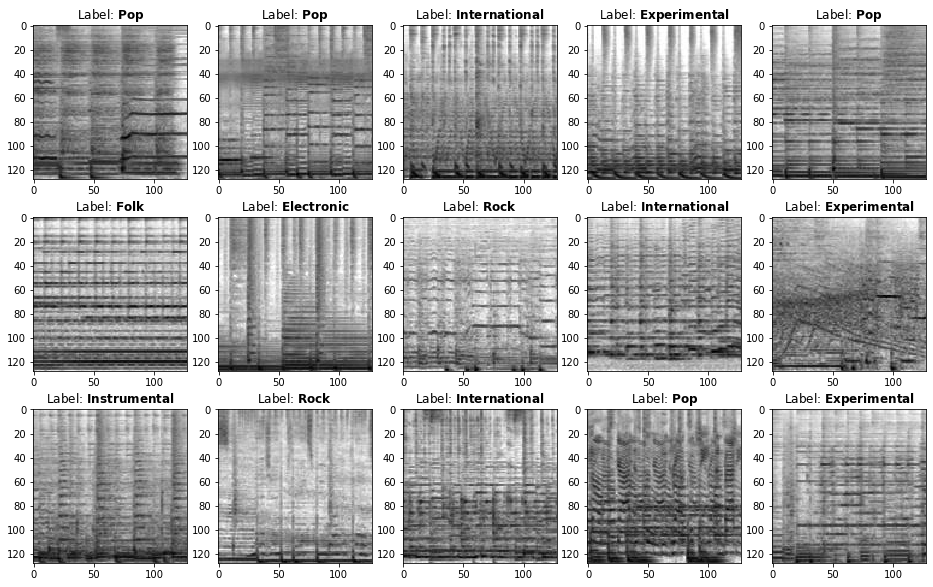

In [6]:
plt.gray()
fig = plt.figure( figsize=(16,10) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.set_title(r"Label: $\bf{}$".format(str(df.loc[rndperm[i],'label'])))
    ax.imshow(df.loc[rndperm[i],feat_cols].values.reshape((128,128)).astype(float))
plt.show()

In [7]:
N = 3998
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values ; len(data_subset)

3998

In [8]:
# Using t-SNE to reduce high-dimensional data "http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf"
time_start = time.time()
# configuring the parameteres
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=800 )
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3998 samples in 4.205s...
[t-SNE] Computed neighbors for 3998 samples in 403.694s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3998
[t-SNE] Computed conditional probabilities for sample 2000 / 3998
[t-SNE] Computed conditional probabilities for sample 3000 / 3998
[t-SNE] Computed conditional probabilities for sample 3998 / 3998
[t-SNE] Mean sigma: 3.114908
[t-SNE] KL divergence after 250 iterations with early exaggeration: 116.345009
[t-SNE] KL divergence after 800 iterations: 2.866386
t-SNE done! Time elapsed: 425.83341217041016 seconds


In [9]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_results.T, df_subset['label'])).T; tsne_data

array([[-38.081485748291016, -2.067899227142334, 'Pop'],
       [-21.46770668029785, -10.68871021270752, 'Pop'],
       [2.3978493213653564, -6.905808448791504, 'International'],
       ...,
       [-1.4942420721054077, -4.898262977600098, 'Instrumental'],
       [-51.95833206176758, -2.986736297607422, 'Experimental'],
       [23.435304641723633, -9.358293533325195, 'Electronic']],
      dtype=object)

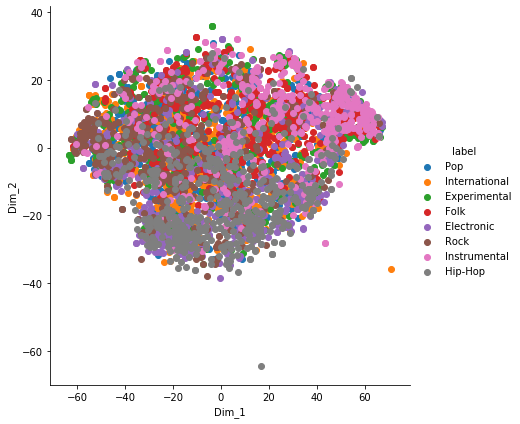

In [14]:
# Ploting the result of tsne
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()